# Partie I - Collecte et traitement des données

1. Téléchargement des données

*1.1. Téléchargement des données à l'aide de l'API*

In [231]:
import requests
import pandas as pd
import os

# URL et clé API
url = "https://www.alphavantage.co/query"
api_key = "O0S7MV4XE2PDKBDF"

# Liste des symboles
symbols = {
    "apple": {"function": "TIME_SERIES_MONTHLY", "symbol": "AAPL"},
    "microsoft": {"function": "TIME_SERIES_MONTHLY", "symbol": "MSFT"},
    "google": {"function": "TIME_SERIES_MONTHLY", "symbol": "GOOGL"},
    "amazon": {"function": "TIME_SERIES_MONTHLY", "symbol": "AMZN"},
    "meta": {"function": "TIME_SERIES_MONTHLY", "symbol": "META"}
}

# Fonction pour télécharger les données
def download_data(asset_name, params):
    params["apikey"] = api_key
    params["datatype"] = "csv"
    response = requests.get(url, params=params)

    if response.status_code == 200:
        filename = f"{asset_name}_data.csv"
        with open(filename, "wb") as file:
            file.write(response.content)
        print(f"Les données de {asset_name} ont été sauvegardées dans {filename}.")
    else:
        print(f"Erreur pour {asset_name}: {response.status_code}, {response.text}")

# Télécharger les données historiques
for asset, params in symbols.items():
    download_data(asset, params)

Les données de apple ont été sauvegardées dans apple_data.csv.
Les données de microsoft ont été sauvegardées dans microsoft_data.csv.
Les données de google ont été sauvegardées dans google_data.csv.
Les données de amazon ont été sauvegardées dans amazon_data.csv.
Les données de meta ont été sauvegardées dans meta_data.csv.


*2.2. Téléchargement des données sur Yahoo Finance*

In [232]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [233]:
import yfinance as yf
import pandas as pd

# Liste des tickers
assets = {
    "Gold": "GC=F",        # Gold Futures
    "Bitcoin": "BTC-USD",  # Bitcoin en USD
    "Ethereum": "ETH-USD", # Ethereum en USD
    "S&P 500": "^GSPC"     # S&P 500 Index
}

# Définir la plage de dates
start_date = "2000-01-01"
end_date = "2024-12-01"

# Télécharger les données pour chaque actif
for asset_name, ticker in assets.items():
    print(f"Téléchargement des données pour {asset_name} ({ticker})...")
    
    # Télécharger les données avec yfinance
    data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
    
    # Sauvegarder dans un fichier CSV
    filename = f"{asset_name.lower()}_historical_data.csv"
    data.to_csv(filename)
    print(f"Données sauvegardées dans {filename}.")

    # Afficher les premières lignes
    print(data.head())


Téléchargement des données pour Gold (GC=F)...


[*********************100%***********************]  1 of 1 completed

Données sauvegardées dans gold_historical_data.csv.
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-09-01  273.600006  278.399994  269.000000  277.000000   4291
2000-11-01  270.100006  270.200012  263.899994  263.899994  32465
2000-12-01  272.000000  276.000000  268.000000  269.700012   1664
2001-01-01  265.600006  268.399994  262.799988  268.399994  17811
2001-02-01  266.799988  268.899994  255.000000  266.299988   1066
Téléchargement des données pour Bitcoin (BTC-USD)...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Données sauvegardées dans bitcoin_historical_data.csv.
Price            Close        High         Low        Open      Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD     BTC-USD
Date                                                                  
2014-10-01  338.321014  411.697998  289.295990  387.427002   902994450
2014-11-01  378.046997  457.092987  320.626007  338.649994   659733360
2014-12-01  320.192993  384.037994  304.231995  378.248993   553102310
2015-01-01  217.464005  320.434998  171.509995  320.434998  1098811912
2015-02-01  254.263000  265.610992  212.014999  216.867004   711518700
Téléchargement des données pour Ethereum (ETH-USD)...



[*********************100%***********************]  1 of 1 completed

Données sauvegardées dans ethereum_historical_data.csv.
Price             Close         High         Low         Open        Volume
Ticker          ETH-USD      ETH-USD     ETH-USD      ETH-USD       ETH-USD
Date                                                                       
2017-12-01   756.732971   881.943970  414.411011   445.209015   79862276544
2018-01-01  1118.310059  1432.880005  742.004028   755.757019  163610220288
2018-02-01   855.198975  1161.349976  574.419006  1119.369995   83393441152
2018-03-01   396.457001   880.302002  368.632996   856.012024   53716179584
2018-04-01   669.924011   708.875000  363.804993   397.253998   60669918656
Téléchargement des données pour S&P 500 (^GSPC)...
Données sauvegardées dans s&p 500_historical_data.csv.
Price             Close         High          Low         Open       Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                                       
20

3. Création et nettoyage de la base de données 

*3.1. Création de la base de données à l'aide des fichiers téléchargés* 

In [237]:
# Liste des fichiers CSV avec leurs noms explicites (uniquement pour les entreprises)
companies = [
    "amazon_data.csv",
    "apple_data.csv",
    "google_data.csv",
    "meta_data.csv",
    "microsoft_data.csv"
]

# Créer un DataFrame principal avec toutes les dates possibles de 2000 à 2024
date_range = pd.date_range(start="2000-01", end="2024-12", freq="M")
final_df = pd.DataFrame({'year_month': date_range.to_period('M')})

# Boucle sur chaque fichier CSV
for file in companies:
    # Charger les données
    df = pd.read_csv(file)

    # Récupérer le nom de la société (extrait du nom de fichier)
    company_name = file.replace("_data.csv", "").replace(".csv", "").replace(" ", "")

    # Convertir la colonne timestamp en datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Ajouter une colonne année-mois
    df['year_month'] = df['timestamp'].dt.to_period('M')

    # Calculer le prix moyen et garder les colonnes nécessaires
    df = df[['year_month', 'high', 'low', 'volume']]
    df[f'{company_name}_stock_price'] = (df['high'] + df['low']) / 2
    df[f'{company_name}_stock_volume'] = df['volume']

    # Garder uniquement les colonnes de la société traitée
    df = df[['year_month', f'{company_name}_stock_price', f'{company_name}_stock_volume']]

    # Supprimer les colonnes existantes dans final_df avant fusion
    for col in [f'{company_name}_stock_price', f'{company_name}_stock_volume']:
        if col in final_df.columns:
            final_df.drop(columns=col, inplace=True)

    # Fusionner directement avec le DataFrame principal
    final_df = pd.merge(final_df, df, on='year_month', how='left')

/tmp/ipykernel_14230/1212085898.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2000-01", end="2024-12", freq="M")


KeyError: 'timestamp'

In [115]:
final_df.head()

,year_month,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume
0,2000-01,74.970,262209000,104.000,112099800,NaN,NaN,NaN,NaN,106.745,637437600
1,2000-02,74.500,207457700,108.470,65355200,NaN,NaN,NaN,NaN,99.060,667243800
2,2000-03,67.625,156584600,132.190,77663900,NaN,NaN,NaN,NaN,101.970,1014093800
3,2000-04,54.720,162012500,122.185,77342900,NaN,NaN,NaN,NaN,80.750,1129073300
4,2000-05,51.410,130688600,104.000,87569200,NaN,NaN,NaN,NaN,67.190,672215400


*3.2. Réorganisation de la base de données initiale*

In [116]:
element_files = [
    "bitcoin_historical_data.csv",
    "ethereum_historical_data.csv",
    "gold_historical_data.csv",
    "s&p 500_historical_data.csv"
]
# Boucle sur chaque fichier d'éléments
for file in element_files:
    # Charger les données en ignorant les deux premières lignes inutiles
    df = pd.read_csv(file, skiprows=2)

    # Récupérer le nom de l'élément
    element_name = file.replace("_historical_data.csv", "").replace(".csv", "").replace(" ", "").lower()

    # Renommer les colonnes en utilisant leur position
    df = df.iloc[:, [0, 2, 3, 5]]  # Sélectionne les colonnes Date, High, Low, Volume
    df.columns = ["timestamp", "high", "low", "volume"]  # Renommer pour uniformité

    # Convertir la colonne timestamp en datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Ajouter une colonne année-mois
    df['year_month'] = df['timestamp'].dt.to_period('M')

    # Calculer le prix moyen
    df[f'{element_name}_price'] = (df['high'] + df['low']) / 2
    df[f'{element_name}_volume'] = df['volume']

    # Garder uniquement les colonnes nécessaires
    df = df[['year_month', f'{element_name}_price', f'{element_name}_volume']]

    # Supprimer les colonnes existantes avant fusion
    for col in [f'{element_name}_price', f'{element_name}_volume']:
        if col in final_df.columns:
            final_df.drop(columns=col, inplace=True)

    # Fusionner avec le DataFrame principal
    final_df = pd.merge(final_df, df, on='year_month', how='left')


In [117]:
final_df.head()

,year_month,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,gold_price,gold_volume,s&p500_price,s&p500_volume
0,2000-01,74.970,262209000,104.000,112099800,NaN,NaN,NaN,NaN,106.745,637437600,NaN,NaN,NaN,NaN,NaN,NaN,1414.070007,21494400000
1,2000-02,74.500,207457700,108.470,65355200,NaN,NaN,NaN,NaN,99.060,667243800,NaN,NaN,NaN,NaN,NaN,NaN,1384.809998,20912000000
2,2000-03,67.625,156584600,132.190,77663900,NaN,NaN,NaN,NaN,101.970,1014093800,NaN,NaN,NaN,NaN,NaN,NaN,1449.744995,26156200000
3,2000-04,54.720,162012500,122.185,77342900,NaN,NaN,NaN,NaN,80.750,1129073300,NaN,NaN,NaN,NaN,NaN,NaN,1433.294983,20106460000
4,2000-05,51.410,130688600,104.000,87569200,NaN,NaN,NaN,NaN,67.190,672215400,NaN,NaN,NaN,NaN,NaN,NaN,1421.299988,19898300000


In [118]:
print(len(final_df))

299


*3.3. Traitement des valeurs manquantes*

In [119]:
# Compter le nombre total de valeurs manquantes dans final_df
missing_values_count = final_df.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes dans final_df : {missing_values_count}")


Nombre total de valeurs manquantes dans final_df : 1294


VM où il y a au moins une valeur dans une année

In [120]:
# Vérifier les colonnes avec des valeurs numériques uniquement
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Remplacer les valeurs manquantes par la moyenne annuelle si possible
for col in numeric_columns:
    # Calculer la moyenne annuelle pour chaque colonne (en ignorant les NaN)
    annual_mean = final_df.groupby(final_df['year_month'].dt.year)[col].transform('mean')
    
    # Remplacer les NaN par la moyenne annuelle calculée
    final_df[col] = final_df[col].fillna(annual_mean)


In [121]:
missing_values_count = final_df.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes dans final_df : {missing_values_count}")

Nombre total de valeurs manquantes dans final_df : 1128


VM qui restent

In [122]:
for col in numeric_columns:
    # Calculer la moyenne globale (en ignorant les NaN)
    global_mean = final_df[col].mean()
    
    # Remplacer les NaN restants par la moyenne globale
    final_df[col] = final_df[col].fillna(global_mean)

In [123]:
final_df.head()

,year_month,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,gold_price,gold_volume,s&p500_price,s&p500_volume
0,2000-01,74.970,262209000,104.000,112099800,760.629032,1.979314e+08,177.585127,6.236496e+08,106.745,637437600,17705.370867,5.175726e+11,1382.316098,3.549254e+11,270.916667,12806.666667,1414.070007,21494400000
1,2000-02,74.500,207457700,108.470,65355200,760.629032,1.979314e+08,177.585127,6.236496e+08,99.060,667243800,17705.370867,5.175726e+11,1382.316098,3.549254e+11,270.916667,12806.666667,1384.809998,20912000000
2,2000-03,67.625,156584600,132.190,77663900,760.629032,1.979314e+08,177.585127,6.236496e+08,101.970,1014093800,17705.370867,5.175726e+11,1382.316098,3.549254e+11,270.916667,12806.666667,1449.744995,26156200000
3,2000-04,54.720,162012500,122.185,77342900,760.629032,1.979314e+08,177.585127,6.236496e+08,80.750,1129073300,17705.370867,5.175726e+11,1382.316098,3.549254e+11,270.916667,12806.666667,1433.294983,20106460000
4,2000-05,51.410,130688600,104.000,87569200,760.629032,1.979314e+08,177.585127,6.236496e+08,67.190,672215400,17705.370867,5.175726e+11,1382.316098,3.549254e+11,270.916667,12806.666667,1421.299988,19898300000


In [124]:
missing_values_count = final_df.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes dans final_df : {missing_values_count}")

Nombre total de valeurs manquantes dans final_df : 0


# Partie II - Partie descriptive

Cette partie a pour objectif de décrire et interpréter les fluctuations de l'or et des principales cryptomonnaies et actions sur les marchés financiers, afin d'analyser si l'or et les cryptomonnaies correspondent aux critères remplis par une valeur refuge. Une valeur refuge est un actif particulièrement demandé lors des périodes de crises parce qu'il est réputé pour conserver sa valeur dans le temps malgré l'instabilité du contexte économique et financier. Ce type d'actif remplit les critères suivants :
- Il dégage des rendements non corrélés à ceux des actions en période de crise
- Il joue un rôle de couverture en dégageant des rendements non corrélés sur le long terme.  

L'or est un actif financier traditionnellement considéré comme une valeur refuge, dans la mesure où il joue un rôle de réserve de valeur de long terme en période de crise. Toutefois les cryptommonnaies comme le Bitcoin sont considérés dans la littérature économique comme une mauvaise réserve de valeur du fait de leur forte volatilité et de l'absence de garantie de sa valeur nominale par une instance publique ou privée. Une étude conduite par T. Moore et N. Christin en 2013, citée par J.M. Figuet, montre que sur les 40 plateformes étudiées, 18 ont fermé, entraînant dans près de la moitié des cas des pertes pour les déposants. En août 2016, Bitfinex a été victime d’un piratage informatique impliquant la perte de 120 000 bitcoins. Ainsi, les cryptomonnaies apparaissent être des actifs financiers particulièrement risqués et peu fiables, ce qui apparaît remettre en cause leur capacité à être une valeur refuge. 

Toutefois, les cryptomonnaies ont le vent en poupe : le président américain Donald Trump a promis dans sa campagne éléctorale de 2024 d’assouplir drastiquement la réglementation du secteur, avec pour objectif de faire des Etats-Unis « la capitale mondiale du bitcoin et des cryptomonnaies ». Les cryptomonnaies ainsi favorisées ne pourraient-t-elles ainsi pas gagner en stabilité et être également considérées comme des valeurs refuges au même titre que l'or ? Par ailleurs, l'or joue-t-il toujours dans les faits le rôle de valeur refuge ? 

1. Travail préliminaire d'aide à la visualisation

*1.1. Affichage des données*

Afin de faciliter la visualisation, on conserve trois décimales pour le prix des actions pour lesquelles ce n'est pas déjà le cas. On conserve six décimales pour le prix des cryptomonnaies. En effet, les cryptomonnaies sont divisibles en très petites unités ; réduire le nombre de décimales serait donc synonyme de perte d'information.

In [125]:
# Arrondir le prix des actions à 3 décimales lorsque nécessaire 
final_df = final_df.round({'amazon_stock_price': 3, 'google_stock_price': 3, 'meta_stock_price': 3})


On effectue également des modifications sur le volume en évitant l'écriture scientifique pour plus de lisibilité. 

In [126]:
# Fonction pour convertir les colonnes spécifiées en entiers
def convert_to_int(df, columns):
    df[columns] = df[columns].astype(int)
    return df

In [127]:
# On utilise alors la fonction avec la liste des colonnes à convertir suivante:
columns_converted = ['google_stock_volume', 'ethereum_volume', 'bitcoin_volume', 's&p500_volume', 'meta_stock_volume']

# Application de la fonction à final_df
final_df = convert_to_int(final_df, columns_converted)

# Afficher les premières lignes du df modifié 
final_df.head()

,year_month,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,gold_price,gold_volume,s&p500_price,s&p500_volume
0,2000-01,74.970,262209000,104.000,112099800,760.629,197931417,177.585,623649587,106.745,637437600,17705.370867,517572575203,1382.316098,354925375295,270.916667,12806.666667,1414.070007,21494400000
1,2000-02,74.500,207457700,108.470,65355200,760.629,197931417,177.585,623649587,99.060,667243800,17705.370867,517572575203,1382.316098,354925375295,270.916667,12806.666667,1384.809998,20912000000
2,2000-03,67.625,156584600,132.190,77663900,760.629,197931417,177.585,623649587,101.970,1014093800,17705.370867,517572575203,1382.316098,354925375295,270.916667,12806.666667,1449.744995,26156200000
3,2000-04,54.720,162012500,122.185,77342900,760.629,197931417,177.585,623649587,80.750,1129073300,17705.370867,517572575203,1382.316098,354925375295,270.916667,12806.666667,1433.294983,20106460000
4,2000-05,51.410,130688600,104.000,87569200,760.629,197931417,177.585,623649587,67.190,672215400,17705.370867,517572575203,1382.316098,354925375295,270.916667,12806.666667,1421.299988,19898300000


*1.2. Premières statistiques descriptives*


On affiche dans un premier temps les statistiques descriptives pour l'ensemble des variables sur toute la période considérée. 

In [ ]:
final_df.describe()

,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,gold_price,gold_volume,s&p500_price,s&p500_volume
count,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,2.990000e+02,299.000000,299.000000,299.000000,2.990000e+02
mean,596.030870,2.338483e+08,174.491543,6.998301e+08,760.629023,1.979314e+08,177.585080,6.236496e+08,95.281551,9.467717e+08,17705.370867,5.175726e+11,1382.316098,3.549254e+11,1130.947491,86970.130202,2089.054264,7.019747e+10
std,926.010738,3.250052e+08,146.158314,5.723511e+08,556.747755,1.904352e+08,90.532894,2.539357e+08,106.370793,4.192055e+08,13593.217299,3.559801e+11,652.536490,1.561093e+11,583.686008,106398.638197,1218.513567,2.891918e+10
min,7.430000,4.346880e+07,13.835000,6.535520e+07,92.190000,2.304129e+07,20.240000,2.261357e+08,16.875000,3.423704e+08,238.188499,5.531023e+08,120.249294,4.445981e+10,261.949997,893.000000,749.884979,1.908910e+10
25%,46.572500,8.275704e+07,77.362500,2.987677e+08,453.977500,4.281145e+07,157.200000,5.049505e+08,27.612500,6.061426e+08,10764.107300,5.175726e+11,1382.316098,3.549254e+11,603.750000,9102.500000,1198.367462,4.829011e+10
50%,166.420000,1.333624e+08,140.775000,5.620912e+08,688.650000,1.458872e+08,177.585000,6.236496e+08,46.980000,8.593311e+08,17705.370867,5.175726e+11,1382.316098,3.549254e+11,1230.500000,19001.400000,1475.320007,7.561031e+10
75%,658.722500,1.916486e+08,204.112500,9.000309e+08,858.920000,2.303744e+08,177.585000,6.236496e+08,105.185000,1.272418e+09,17705.370867,5.175726e+11,1382.316098,3.549254e+11,1608.324982,157753.000000,2712.147522,8.618484e+10
max,3540.029000,2.035252e+09,680.535000,3.886793e+09,2925.680000,9.527097e+08,582.235000,2.032635e+09,440.280000,3.044579e+09,83229.574219,2.267153e+12,4412.605591,1.510330e+12,2695.750000,443701.000000,5870.339844,1.621854e+11


A noter que le premier mois pour lequel on a pu collecter les données sont:
- Pour Google: 2004-09
- Pour Meta: 2012-06
- Pour l'Ethereum: 2017-12
- Pour le Bitcoin: 2014-10
- Pour l'or: 2000-09

On effectue également l'analyse à partir du mois de décembre 2017 pour avoir les statistiques les plus récentes avec toutes les données disponibles.

In [ ]:
# Filtrage des données postérieures à décembre 2017
latest_data = final_df[final_df['year_month'] >= '2017-12']

# Statistiques descriptives sur les données les plus récentes 
latest_data.describe()

,amazon_stock_price,amazon_stock_volume,apple_stock_price,apple_stock_volume,google_stock_price,google_stock_volume,meta_stock_price,meta_stock_volume,microsoft_stock_price,microsoft_stock_volume,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,gold_price,gold_volume,s&p500_price,s&p500_volume
count,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,8.400000e+01,84.000000,84.00000,84.000000,8.400000e+01
mean,1594.253667,4.697608e+08,187.072438,1.282012e+09,1145.468440,2.387685e+08,259.706262,4.777404e+08,238.366378,5.961304e+08,27046.966609,8.010751e+11,1478.453297,3.909455e+11,1745.663167,107779.49145,3791.361604,8.687678e+10
std,1228.862564,5.396450e+08,52.987103,6.516978e+08,885.194366,2.874301e+08,112.895236,1.914812e+08,104.984100,1.768703e+08,20394.128314,4.773935e+11,1203.331925,2.759660e+11,348.589170,118724.77008,892.269236,1.591233e+10
min,89.460000,5.206047e+07,114.655000,3.938439e+08,92.190000,2.304129e+07,103.415000,2.261357e+08,84.099950,3.423704e+08,3750.340454,1.184369e+11,120.249294,4.445981e+10,1192.549988,4126.00000,2573.380005,6.303151e+10
25%,175.215000,7.801962e+07,149.620000,7.381035e+08,160.786750,3.362435e+07,179.716250,3.341730e+08,138.373750,4.801091e+08,9139.994873,4.686604e+11,278.960136,1.999103e+11,1403.262502,9281.75000,2913.869934,7.762015e+10
50%,1723.557500,1.144326e+08,174.112500,1.185673e+09,1167.820000,4.132788e+07,216.230000,4.400423e+08,236.045000,5.624099e+08,22068.976562,7.729387e+11,1430.734009,3.697663e+11,1793.075043,35064.50000,3874.002502,8.243948e+10
75%,2930.565000,9.361697e+08,207.103750,1.684877e+09,1559.839000,5.371061e+08,316.000750,5.534249e+08,310.186250,6.690356e+08,42547.661621,1.051473e+12,2369.349976,5.218055e+11,1935.687500,196233.00000,4393.913879,9.240001e+10
max,3540.029000,2.035252e+09,391.120000,3.886793e+09,2925.680000,9.527097e+08,582.235000,1.127891e+09,440.280000,1.612954e+09,83229.574219,2.267153e+12,4412.605591,1.510330e+12,2695.750000,443701.00000,5870.339844,1.621854e+11


On remarque que les actions Amazon, Google et Meta, Microsoft ainsi que le Bitcoin et l'or ont connu leur maximum historique entre fin 2017 et 2024. Google a également atteint son prix minimal pendant la période la plus récente. Pour toutes les autres actions et pour l'or et les cryptomonnaies créées avant 2017, le prix minimum a été atteint avant décembre 2017. On observe donc une tendance de décalage vers le haut du prix minimal. Pour le Bitcoin, on remarque que le prix minimal sur la période récente (20394.128314$) est bien supérieur à celui sur la période antérieure à décembre 2017 (238.188499$), ce qui montre l'attrait croissant pour la détention pour le Bitcoin au fil des années. 

*1.3. Premières représentations graphiques*

In [130]:
# Import de Matplotlib - à mettre au tout début du projet avec tous les imports? + réfléchir à faire une fonction qui trace les graphiques pour alléger le code 
import matplotlib.pyplot as plt

On représente dans un premier temps le prix des différentes cryptomonnaies et de l'or depuis décembre 2017.

In [131]:
# Convertir year_month en timestamp
latest_data['year_month'] = latest_data['year_month'].dt.to_timestamp()

/tmp/ipykernel_14230/2846099359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['year_month'] = latest_data['year_month'].dt.to_timestamp()


In [132]:
# Fonction pour déterminer le mois où une variable a atteint son maximum historique 
def get_month_with_max_price(dataframe, price_column, date_column='year_month'):
    """
    Retourne le mois où une colonne de prix atteint sa valeur maximale.
    
    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        price_column (str): Le nom de la colonne de prix.
        date_column (str): Le nom de la colonne de date, par défaut 'year_month'.
    
    Returns:
        str: La valeur de la colonne de date correspondant au prix maximal.
    """
    max_price_row = dataframe[dataframe[price_column] == dataframe[price_column].max()]
    if not max_price_row.empty:
        return max_price_row[date_column].values[0]
    return None

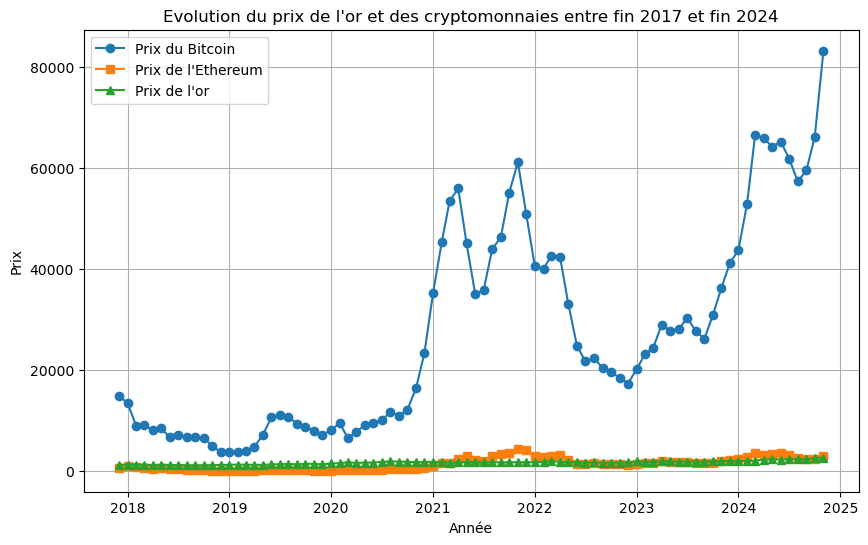

In [133]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour les 3 variables
plt.plot(latest_data['year_month'], latest_data['bitcoin_price'], label='Prix du Bitcoin', marker='o')  # Courbe pour le Bitcoin
plt.plot(latest_data['year_month'], latest_data['ethereum_price'], label="Prix de l'Ethereum", marker='s')  # Courbe pour l'Ethereum
plt.plot(latest_data['year_month'], latest_data['gold_price'], label="Prix de l'or", marker='^')  # Courbe pour l'or

plt.title("Evolution du prix de l'or et des cryptomonnaies entre fin 2017 et fin 2024")
plt.xlabel('Année')  # Modifier en fonction de l'axe x, par exemple une colonne 'Date'
plt.ylabel('Prix')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

In [134]:
# On détermine le mois où l'Ethereum a atteint son maximum historique
get_month_with_max_price(final_df,'gold_price')

Period('2024-10', 'M')

On observe graphiquement une forte volatilité du Bitcoin. Les tendances haussières ou baissières sont nombreuses et n'apparaissent pas durables sur le moyen terme. En 2021 par exemple, la tendance s'est ainsi inversée trois fois, avec deux périodes de forte hausse et deux périodes de forte baisse. Le cours du Bitcoin a atteint son maximum historique en octobre 2024 avec un cours de 83229.574219$.  

Dans un objectif de lisibilité, on trace un graphique avec seulement l'or et l'Ethereum pour mieux rendre compte graphiquement des variations du prix.

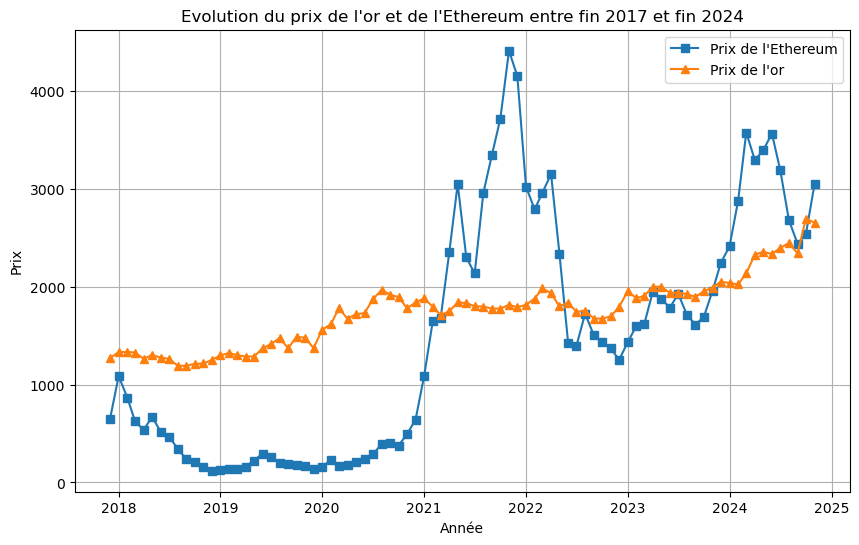

In [135]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour les 2 variables
plt.plot(latest_data['year_month'], latest_data['ethereum_price'], label="Prix de l'Ethereum", marker='s')  # Courbe pour l'Ethereum
plt.plot(latest_data['year_month'], latest_data['gold_price'], label="Prix de l'or", marker='^')  # Courbe pour l'or

plt.title("Evolution du prix de l'or et de l'Ethereum entre fin 2017 et fin 2024")
plt.xlabel('Année')  
plt.ylabel('Prix')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

In [136]:
# On détermine le mois où l'Ethereum a atteint son maximum historique
get_month_with_max_price(final_df,'ethereum_price')

Period('2021-11', 'M')

On remarque que le cours de l'Ethereum connaît de fortes variations sur la période considérée, avec une forte augmentation à partit de fin 2021 et un pic historique en novembre 2021. Le cours de l'or apparaît plus stable dans le temps, avec de faibles variations sur le court terme, avec une tendance haussière globale. 

On représente également le prix des actions ainsi que le volume entre 2000 et aujourd'hui. !!! Séparer volumes et prix car on observe que les volumes sont bien plus importants donc problème de représentation graphique.

In [137]:
# On effectue la même modification sur les dates sur final_df pour pouvoir effectuer la représentation graphique
final_df['year_month'] = final_df['year_month'].dt.to_timestamp()

On choisit de présenter le graphique sous une forme interactive. 

On représente également l'évolution pour le S&P 500 sur toute la période et sur la période la plus récente. 

Sur toute la période, on obtient les graphiques suivants. 

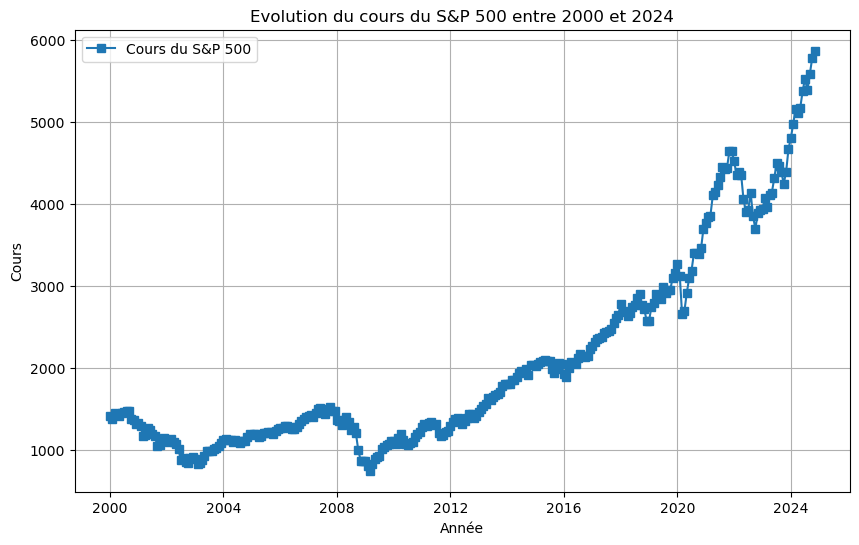

In [138]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour la variable
plt.plot(final_df['year_month'], final_df['s&p500_price'], label="Cours du S&P 500", marker='s')  


plt.title("Evolution du cours du S&P 500 entre 2000 et 2024")
plt.xlabel('Année')  
plt.ylabel('Cours')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

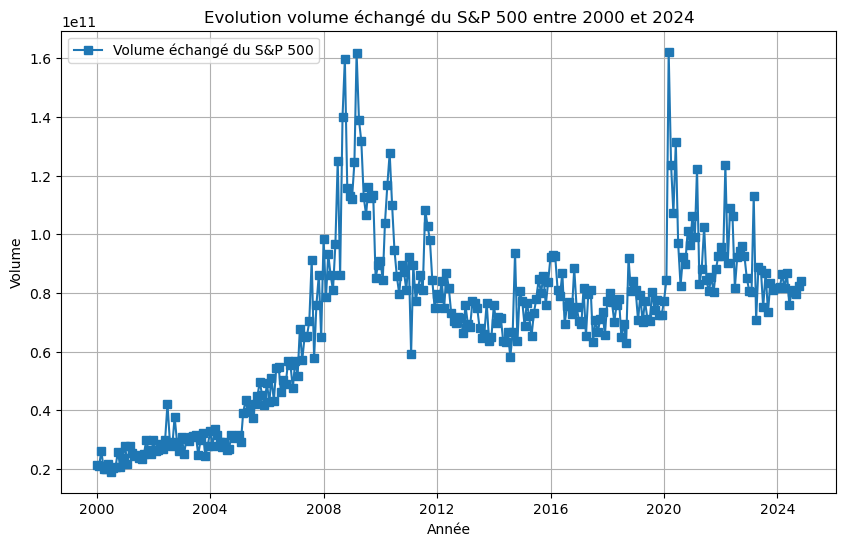

In [139]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour la variable
plt.plot(final_df['year_month'], final_df['s&p500_volume'], label="Volume échangé du S&P 500", marker='s')  


plt.title("Evolution volume échangé du S&P 500 entre 2000 et 2024")
plt.xlabel('Année')  
plt.ylabel('Volume')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

Sur la période la plus récente, on obtient les graphiques suivants.

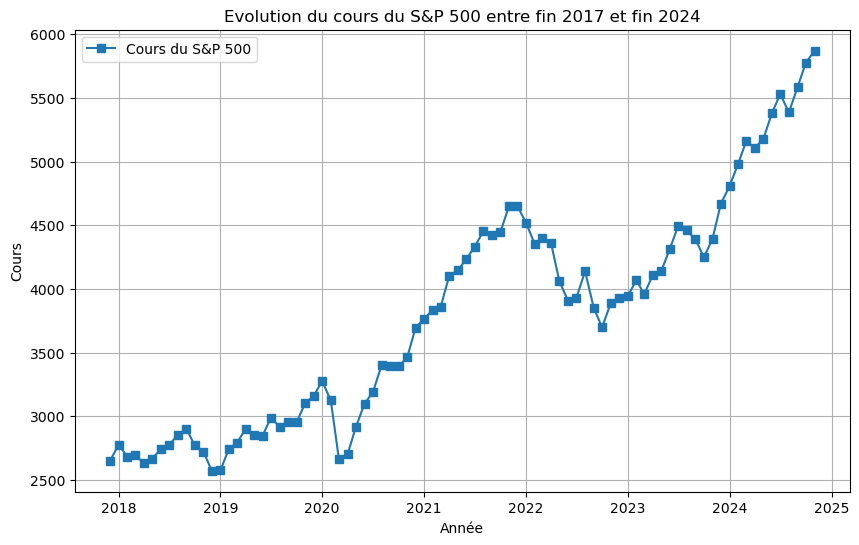

In [140]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour la variable
plt.plot(latest_data['year_month'], latest_data['s&p500_price'], label="Cours du S&P 500", marker='s')  


plt.title("Evolution du cours du S&P 500 entre fin 2017 et fin 2024")
plt.xlabel('Année')  
plt.ylabel('Cours')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

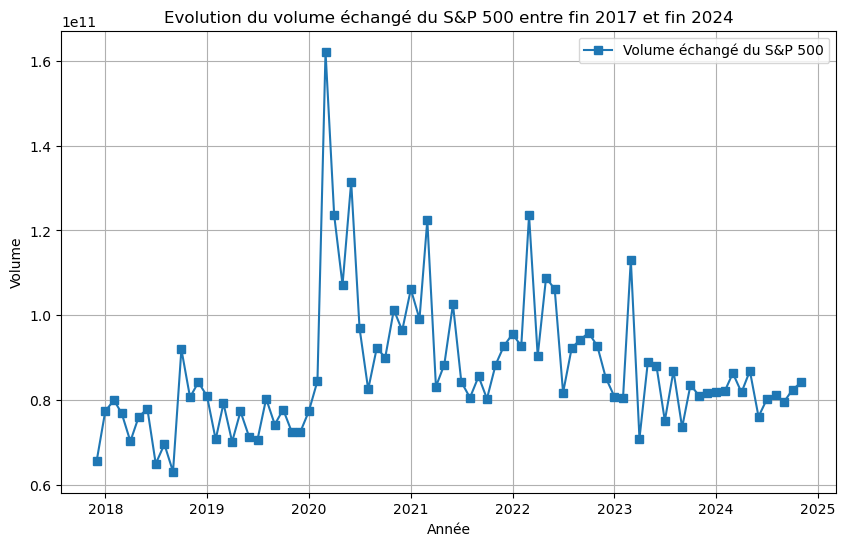

In [141]:
plt.figure(figsize=(10, 6))


# Tracer les courbes pour la variable
plt.plot(latest_data['year_month'], latest_data['s&p500_volume'], label="Volume échangé du S&P 500", marker='s')  


plt.title("Evolution du volume échangé du S&P 500 entre fin 2017 et fin 2024")
plt.xlabel('Année')  
plt.ylabel('Volume')
plt.legend()  # Afficher la légende
plt.grid(True)  # Afficher une grille

# Afficher le graphique
plt.show()

2. Analyse des relations entre l'or et les cryptomonnaies et différentes variables 

*2.1. Corrélation entre les rendements de l'or, des cryptomonnaies et du marché boursier*

Les travaux de Baur et Lucey [2010] et de Baur et McDermott [2010] montrent que l'or est une valeur refuge si la corrélation entre les rendements des indices boursiers et ceux de l'or est négative ou nulle pendant les crises. On cherche alors à vérifier si cette condition est respectée pour l'or pour la période de la crise de 2008 et de la crise du COVID-19. Par extension, on examine également les résultats pour les cryptomonnaies pour la période de la crise du COVID-19. 

In [142]:
# Ajout d'une colonne avec les rendements de l'or et des cryptomonnaies dans final_df
final_df['gold_returns'] = final_df['gold_price'].pct_change()
final_df['bitcoin_returns'] = final_df['bitcoin_price'].pct_change()
final_df['ethereum_returns'] = final_df['ethereum_price'].pct_change()
final_df['s&p500_returns'] = final_df['s&p500_price'].pct_change()

In [143]:
import seaborn as sns

On étudie la corrélation entre les rendements de l'or, des cryptomonnaies et du marché boursier pendant la crise du Covid-19. 

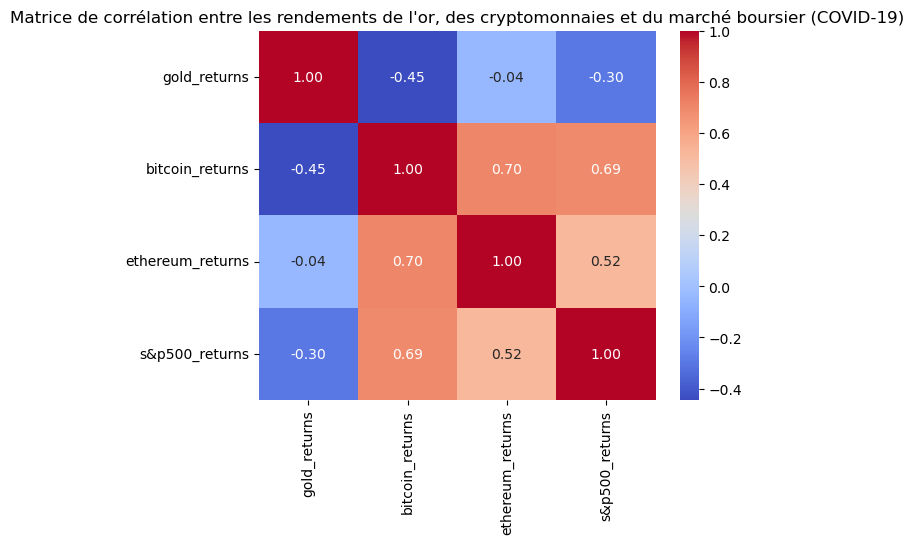

In [ ]:
# Définir la période de crise COVID-19 (mars 2020 à décembre 2021)
crisis_covid_df = final_df[(final_df['year_month'] >= '2020-02') & (final_df['year_month'] <= '2020-12')]

correlation_matrix_covid = crisis_covid_df[['gold_returns', 'bitcoin_returns', 'ethereum_returns', 's&p500_returns']].corr()
sns.heatmap(correlation_matrix_covid, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre les rendements de l'or, des cryptomonnaies et du marché boursier (COVID-19)")
plt.show()

On observe pendant la crise du COVID-19 une corrélation négative entre les rendements de l'indice du S&P 500 et ceux de l'or, -0.3 étant toutefois plus proche de 0 que de la corrélation négative parfaite, -1. Les rendements du bitcoin et de l'ethereum sont corrélés positivement à ceux de l'indice du S&P 500. une baisse des rendements sur le marché boursier a donc tendance a priori à faire augmenter les rendements de l'or et à faire baisser ceux des cryptomonnaies. 

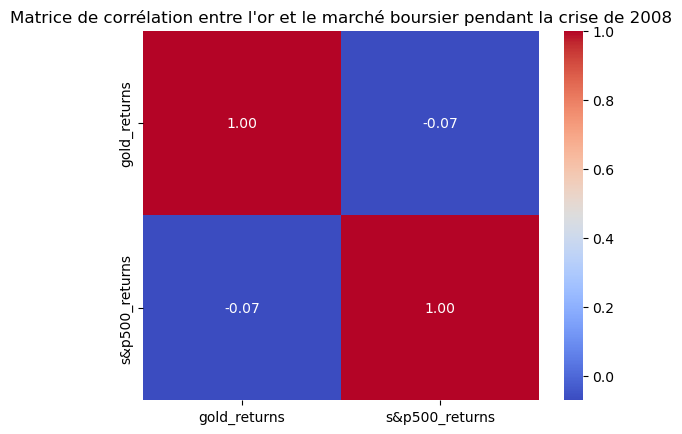

In [ ]:
# Définir la période de crise de 2008 (janvier 2008 à décembre 2009)
crisis_2008_df = final_df[(final_df['year_month'] >= '2008-01') & (final_df['year_month'] <= '2009-12')]

correlation_matrix_2008 = crisis_2008_df[['gold_returns', 's&p500_returns']].corr()
sns.heatmap(correlation_matrix_2008, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre l'or et le marché boursier pendant la crise de 2008")
plt.show()

On observe pendant la crise de 2008 une corrélation négative très proche de 0 entre les rendements de l'or et ceux de l'indice du S&P 500.

Cette première analyse à l'aide des matrices de corrélation des rendements des différents actifs en période de crise montre que l'or peut sous cette approche être considérée comme un valeur refuge, contrairement aux cryptomonnaies. 

*2.2. Relation entre volume échangé et prix*

L'objectif est d'identifier si les volumes échangés influencent les prix.

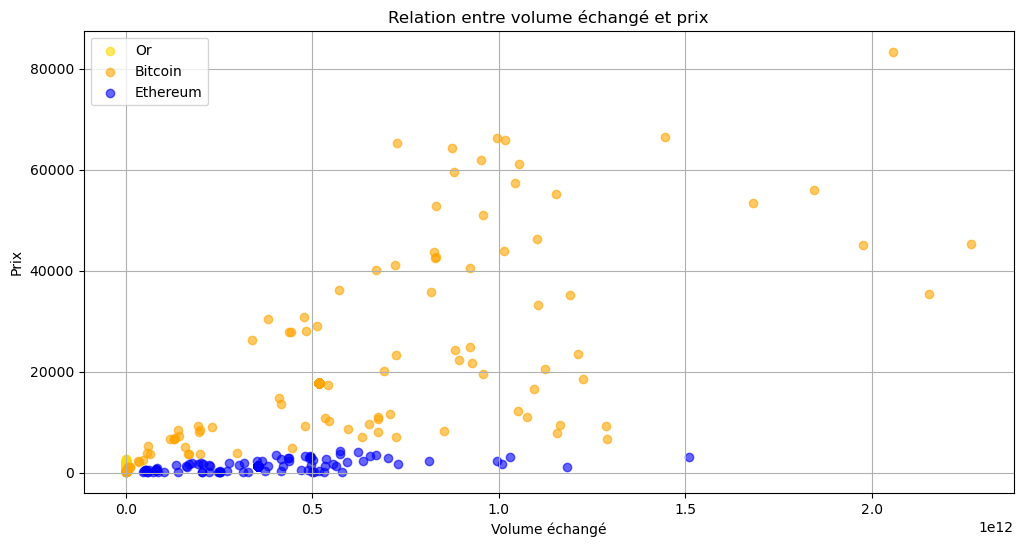

In [146]:
plt.figure(figsize=(12, 6))
plt.scatter(final_df['gold_volume'], final_df['gold_price'], label="Or", alpha=0.6, color='gold')
plt.scatter(final_df['bitcoin_volume'], final_df['bitcoin_price'], label="Bitcoin", alpha=0.6, color='orange')
plt.scatter(final_df['ethereum_volume'], final_df['ethereum_price'], label="Ethereum", alpha=0.6, color='blue')
plt.title("Relation entre volume échangé et prix")
plt.xlabel("Volume échangé")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()

3. Analyse de la volatilité. 

L'objectif est de comparer la stabilité des prix, car une valeur refuge doit être peu volatile.

*3.1. Boxplot sur la volatilité des rendements de l'or et des crytptomonnaies sur toute la période*

/tmp/ipykernel_14230/3231914397.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([final_df['gold_returns'].dropna(),


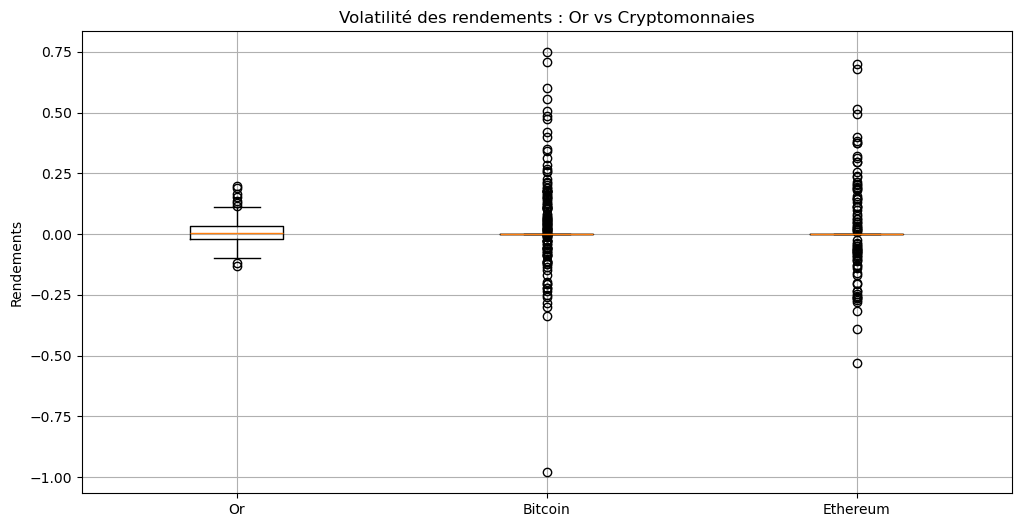

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([final_df['gold_returns'].dropna(), 
             final_df['bitcoin_returns'].dropna(), 
             final_df['ethereum_returns'].dropna()],
            labels=["Or", "Bitcoin", "Ethereum"])
plt.title("Volatilité des rendements : Or vs Cryptomonnaies")
plt.ylabel("Rendements")
plt.grid(True)
plt.show()

*3.2. Performance des actifs financiers en période de crise*

On choisit de comparer la performance de l'or et des cryptomonnaies pendant la crise de 2020. 

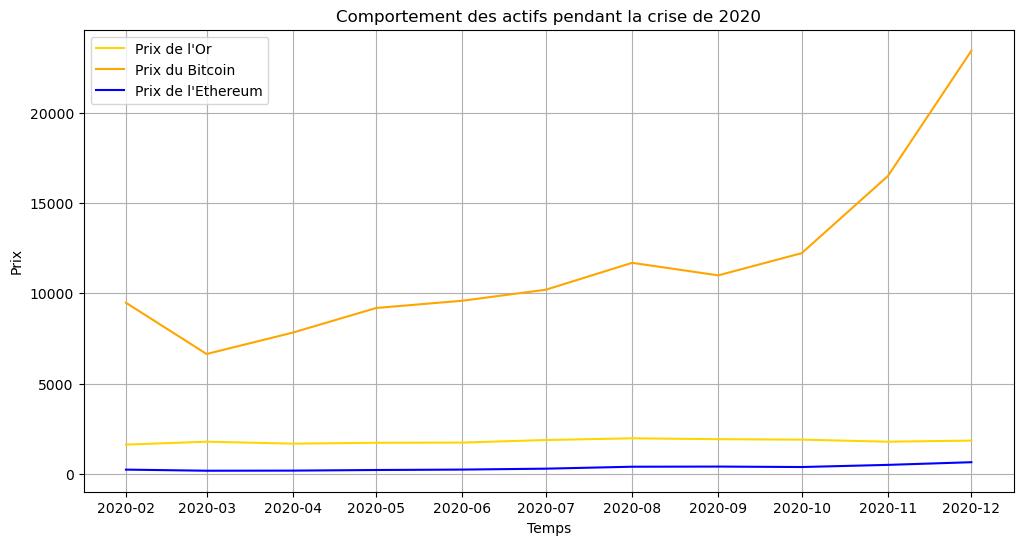

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(crisis_covid_df['year_month'], crisis_covid_df['gold_price'], label="Prix de l'Or", color='gold')
plt.plot(crisis_covid_df['year_month'], crisis_covid_df['bitcoin_price'], label="Prix du Bitcoin", color='orange')
plt.plot(crisis_covid_df['year_month'], crisis_covid_df['ethereum_price'], label="Prix de l'Ethereum", color='blue')
plt.title("Comportement des actifs pendant la crise de 2020")
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.legend()
plt.grid(True)
plt.show()

*3.3. Ratio de Sharpe*

On compare le rendement ajusté au risque des cryptomonnaies et de l'or pour évaluer la performance sur toute la période.

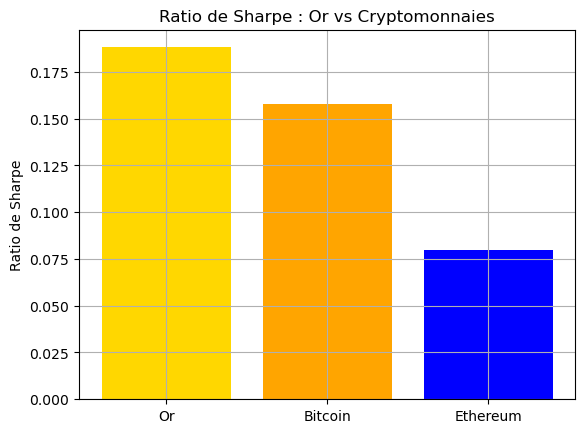

In [149]:
sharpe_ratios = {
    "Or": final_df['gold_returns'].mean() / final_df['gold_returns'].std(),
    "Bitcoin": final_df['bitcoin_returns'].mean() / final_df['bitcoin_returns'].std(),
    "Ethereum": final_df['ethereum_returns'].mean() / final_df['ethereum_returns'].std()
}
plt.bar(sharpe_ratios.keys(), sharpe_ratios.values(), color=['gold', 'orange', 'blue'])
plt.title("Ratio de Sharpe : Or vs Cryptomonnaies")
plt.ylabel("Ratio de Sharpe")
plt.grid(True)
plt.show()

# Partie III- Modélisation

En bourse, un actif financier est qualifié de « valeur refuge » si sa valeur se maintienne ou augmente pendant les périodes d'incertitude économique et de turbulence du marché boursier. C’est un actif utilisé par les investisseurs pour protéger leur capital lors des périodes de crise sur les marchés. Par conséquent, la corrélation entre cet actif et les actions pendant les périodes de crise est négative. 
Nous cherchons, dans une première partie, à vérifier si l’or est une valeur refuge. Pour cela, nous nous appuyons sur les travaux de Virginie Coudert et Hélène Raymond, qui ont analysé les comportements financiers de l’or à l'aide du modèle ARMA-GARCH. Ces modèles permettent d'étudier les rendements et la volatilité des actifs dans le temps, en capturant les dynamiques propres aux périodes de crises et de stabilité. Dans une seconde partie, nous proposons d'utiliser le même modèle afin de tester si la cryptomonnaie peut être considérée comme une valeur refuge. Pour ce faire, nous avons choisi d'analyser les deux cryptomonnaies les plus connues : le Bitcoin et l'Ethereum.

Le modèle ARMA-GARCH est utilisé pour des séries temporelles stationnaires. Comme les prix des actifs ne sont pas généralement stationnaires, les deux chercheuses utilisent le rendement logarithmique des prix qui s’écrit sous la forme $$r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$$  et qui est bien stationnaire. En effet, $$\lim_{r_t \to 0} r_t = 0$$. 


Les deux chercheuses proposent de travailler avec le modèle ARMA-GARCH(1,1). L'équation représentant la dynamique des rendements des actifs est donnée par ce modèle comme : 

$$
r_t^k = c^k + a_1^k r_{t-1}^k + b_1^k \epsilon_{t-1}^k\leq 0 \quad \quad \text{(1)} \quad \text{pour } k = G, S
$$
où
- $ r_t^k $ : Rendement de l'actif $ k $ à l'instant $ t $.
- $ c^k $ : Constante spécifique à l'actif $ k $.
- $ a_i^k $ : Coefficients des retards.
- $ b_i^k $ : Coefficients des erreurs.
- $ \epsilon_{t-1}^k $ : Résidus au temps $ t-1 $ pour l'actif $ k $.

Le modèle utilisé inclut également un système d'équations pour modéliser la variance conditionnelle des actifs et leur covariance. Ce système s'exprime comme suit :
$$
\begin{cases} 
h_t^k = c^k + \alpha^k \epsilon_{t-1}^2 + \beta^k h_{t-1}^k + d^k \text{dum}_{\epsilon_k < 0} \epsilon_{t-1}^2 + \delta^k \text{dum}_{\text{crise}}, \quad \text{(2)} & k = G, S \\[10pt]
h_t^{GS} = c^{GS} + \alpha^{GS} \epsilon_{G,t-1} \epsilon_{S,t-1} + \beta^{GS} h_{t-1}^{GS} + d^{GS} \text{dum}_{\epsilon_{S,t-1} < 0, \epsilon_{G,t-1} < 0} \epsilon_{G,t-1} \epsilon_{S,t-1} + \delta^{GS} \text{dum}_{\text{crise}}, \quad \text{(3)}
\end{cases}
$$


où 
- $h_t^k$ : Variance conditionnelle de l'actif $k$ (or ou actions).
- $h_t^{GS}$ : Covariance conditionnelle entre l'or et les actions.
- $\text{dum}_{\text{crise}}$ : Variable muette prenant la valeur 1 pendant les périodes de crise, 0 sinon.
- $\text{dum}_{\epsilon_k < 0}$ : Variable muette prenant la valeur 1 lorsque $\epsilon_k$ (choc de l'actif $k$) est négatif, 0 sinon.
- $\text{dum}_{\epsilon_S < 0, \epsilon_G < 0}$ : Variable muette prenant la valeur 1 lorsque $\epsilon_S$ (choc des actions) et $\epsilon_G$ (choc de l'or) sont tous deux négatifs, 0 sinon.
- $\epsilon_k$ : Choc de l'actif $k$.
- $\epsilon_S$ : Choc des actions.
- $\epsilon_G$ : Choc de l'or.



Les deux chercheuses concluent dans leurs travaux que, pour que l'or soit considéré comme une valeur refuge, il doit satisfaire la condition suivante :
$$
c^{GS} + \delta^{GS} \leq 0 \quad \quad \text{(C1)}
$$


Notre objectif principal se résume à vérifier la condition $(C1)$. Nous chercherons à effectuer une régression pour extraire les coefficients $ c^{GS} $ et $ \delta^{GS} $ de l'équation $ (3) $. Cependant, tous les régresseurs de cette équation ne sont pas directement connus. Il sera donc nécessaire de les identifier et de les calculer au préalable.


Nous allons commencer par déterminer la variable $ \text{dum}_{\text{crise}} $, qui prend la valeur 1 s'il y a une crise et 0 sinon. Pour identifier les périodes de crise, nous utilisons l'indice **S&P 500** comme indicateur. Cet indice est choisi car il représente un large éventail d'actions américaines et est souvent considéré comme un baromètre de la santé économique et financière globale. Une baisse significative du S&P 500 est donc un signal fiable de conditions de marché défavorables.

Nous définissons une crise comme une période où le S&P 500 chute de plus de 10 % par rapport à son maximum des 6 derniers mois. Le processus est implémenté comme suit :

In [150]:
# Calculer le maximum des 6 derniers mois
final_df['6_months_max'] = final_df['s&p500_price'].rolling(window=6, min_periods=6).max()

# Calculer la variation en pourcentage par rapport au maximum des 6 derniers mois
final_df['percent_change'] = (final_df['s&p500_price'] - final_df['6_months_max']) / final_df['6_months_max'] * 100

# Détecter les crises avec un seuil de -10 %
final_df['crisis'] = final_df['percent_change'].apply(lambda x: 1 if x <= -10 else (0 if pd.notna(x) else pd.NA))

# Afficher uniquement les lignes où une crise est détectée
crisis_df = final_df[final_df['crisis'] == 1]
print(crisis_df[['year_month', 's&p500_price', '6_months_max', 'percent_change', 'crisis']])

    year_month  s&p500_price  6_months_max  percent_change crisis
11  2000-12-01   1321.559998   1475.320007      -10.422146      1
13  2001-02-01   1295.909973   1474.764954      -12.127694      1
14  2001-03-01   1174.304993   1380.304993      -14.924238      1
15  2001-04-01   1180.645020   1366.679993      -13.612182      1
20  2001-09-01   1050.075012   1273.965027      -17.574267      1
21  2001-10-01   1068.684998   1273.965027      -16.113474      1
22  2001-11-01   1108.845032   1244.825012      -10.923622      1
29  2002-06-01   1011.829987   1140.334961      -11.269055      1
30  2002-07-01    885.070007   1140.334961      -22.385085      1
31  2002-08-01    899.220001   1140.334961      -21.144222      1
32  2002-09-01    862.110016   1105.649963      -22.026858      1
33  2002-10-01    838.035004   1077.774963      -22.243972      1
34  2002-11-01    906.934998   1011.829987      -10.366859      1
96  2008-01-01   1370.910034   1532.825012      -10.563174      1
97  2008-0

Si l'on affiche les résultats de cette méthode, on peut constater que, par exemple, les crises détectées en 2020 commencent dès **03-2020**. Cela est cohérent avec l'apparition de la pandémie de COVID-19, qui a eu un impact immédiat sur les marchés financiers. Ce constat valide l'approche utilisée pour identifier les périodes de crise.

In [151]:
filtered_2020_crisis = final_df[(final_df['crisis'] == 1) & (final_df['year_month'].astype(str).str.startswith('2020'))]

# Afficher uniquement les colonnes 'year_month' et 'crisis'
print(filtered_2020_crisis[['year_month', 'crisis']])

    year_month crisis
242 2020-03-01      1
243 2020-04-01      1
244 2020-05-01      1


In [ ]:
!pip install arch

In [153]:
import numpy as np
from arch import arch_model

In [ ]:
# Calcul des rendements logarithmiques pour l'or
final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1))

# Calcul des rendements logarithmiques pour Amazon
final_df['stock_return'] = np.log(final_df['amazon_stock_price'] / final_df['amazon_stock_price'].shift(1))

# Supprimer les lignes avec des valeurs manquantes (les premières lignes créées par shift)
final_df = final_df.dropna()

# Afficher les premières lignes pour vérifier
print(final_df[['gold_return', 'stock_return']].head())

   gold_return  stock_return
5     0.000000     -0.126526
6     0.000000     -0.232291
7     0.000000      0.020125
8     0.010221      0.149892
9    -0.010221     -0.386845


In [155]:
import numpy as np
import pandas as pd
from arch import arch_model
from scipy.optimize import minimize
from statsmodels.api import OLS, add_constant

Nous allons maintenant passer à la récupération des $ \epsilon_t^G $ pour l'or et $ \epsilon_t^S $ pour les actions, ce qui nous permettra également de calculer les variables nécessaires dans les équations suivantes. Ces $ \epsilon $ apparaissent explicitement dans l'équation des rendements $ (1) $.

Ces résidus seront également nécessaires pour définir les variables muettes suivantes :
- $ \text{dum}_{\epsilon_G < 0} $ : Prend la valeur 1 lorsque $ \epsilon_t^G $ (choc de l'or) est négatif, 0 sinon.
- $ \text{dum}_{\epsilon_S < 0} $ : Prend la valeur 1 lorsque $ \epsilon_t^S $ (choc des actions) est négatif, 0 sinon.
- $ \text{dum}_{\epsilon_S < 0, \epsilon_G < 0} $ : Prend la valeur 1 lorsque $ \epsilon_t^S $ et $ \epsilon_t^G $ sont tous deux négatifs.

Pour calculer ces $ \epsilon_t^G $ pour l'or et $ \epsilon_t^S $ pour les actions, nous procédons en deux étapes :
1. **Calcul des rendements :**  
   Nous calculons les rendements $ r_t^G $ pour l'or et $ r_t^S $ pour les actions à partir des prix des actifs en utilisant la formule logarithmique suivante :  
   $$ r_t^k = \log\left(\frac{P_t^k}{P_{t-1}^k}\right) $$

2. **Application du modèle GARCH-ARMA(1,1) :**  
   Nous utilisons un modèle **GARCH-ARMA(1,1)** prédéfini dans Python pour estimer les résidus $ \epsilon_t^G $ pour l'or et $ \epsilon_t^S $ pour les actions ainsi que leurs retards correspondants $ \epsilon_{t-1}^G $ et $ \epsilon_{t-1}^S $.


Nous proposons de montrer un exemple ici, testé sur les données des actions d'Amazon. 

In [156]:
# 1. Préparer les données
final_df = final_df[(final_df['gold_price'] > 0) & (final_df['amazon_stock_price'] > 0)]
final_df = final_df.dropna()

# Calculer les rendements logarithmiques
final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1)) * 100
final_df['amazon_stock_return'] = np.log(final_df['amazon_stock_price'] / final_df['amazon_stock_price'].shift(1)) * 100
final_df = final_df.dropna()

# 2. Ajuster les modèles GARCH univariés
gold_model = arch_model(final_df['gold_return'], mean='Zero', vol='Garch', p=1, q=1)
gold_fit = gold_model.fit(disp="off")

amazon_model = arch_model(final_df['amazon_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
amazon_fit = amazon_model.fit(disp="off")
# Extraire les résidus standardisés
gold_std_resid = gold_fit.std_resid
amazon_std_resid = amazon_fit.std_resid

# Variables muettes basées sur les résidus standardisés
final_df['dum_gold_neg'] = (gold_std_resid < 0).astype(int)
final_df['dum_stock_neg'] = (amazon_std_resid < 0).astype(int)
final_df['interaction'] = final_df['dum_gold_neg'] * final_df['dum_stock_neg']

In [ ]:
# 3. Calcul de la covariance conditionnelle
final_df['covariance_conditionnelle'] = gold_std_resid * amazon_std_resid

# 4. Ajouter la variable de crise
final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)  # Variable de crise (assurez-vous que 'crisis' existe)

# 5. Régression pour estimer c_GS et delta_GS
X = final_df[['gold_return', 'amazon_stock_return', 'interaction', 'dum_crise']]
X = add_constant(X)  # Ajouter une constante pour inclure c_GS
y = final_df['covariance_conditionnelle']

model_hGS = OLS(y, X)
results_hGS = model_hGS.fit()

# 6. Résultats de la régression
print("\nRésultats de la régression pour h_GS :")
print(results_hGS.summary())


Résultats de la régression pour h_GS :
                                OLS Regression Results                               
Dep. Variable:     covariance_conditionnelle   R-squared:                       0.121
Model:                                   OLS   Adj. R-squared:                  0.109
Method:                        Least Squares   F-statistic:                     9.918
Date:                       Fri, 27 Dec 2024   Prob (F-statistic):           1.57e-07
Time:                               17:40:53   Log-Likelihood:                -408.77
No. Observations:                        293   AIC:                             827.5
Df Residuals:                            288   BIC:                             845.9
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------

In [158]:
# Extraire les coefficients
c_GS = results_hGS.params['const']
delta_GS = results_hGS.params['dum_crise']
cGS_sum = c_GS + delta_GS
cGS_sum

np.float64(-0.21330410455353124)

Comme la somme est bien négative, la condition $ (C1) $ est vérifiée. Nous pouvons donc conclure que l'or peut être considéré comme une valeur refuge.


Pour traiter les actions des autres entreprises, plutôt que de réutiliser le même code à chaque fois, nous proposons de définir une fonction générique prenant en paramètre le nom de l’entreprise : `analyze_company(company_name)`. Cette fonction permettra d'automatiser l'analyse.


In [159]:
def analyze_company(company_name):
    """
    Applique un modèle ARMA-GARCH univarié et effectue une régression pour estimer c_GS et delta_GS pour une entreprise donnée.

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant c_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['gold_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['gold_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Variables muettes basées sur les résidus standardisés
    final_df['dum_gold_neg'] = (gold_std_resid < 0).astype(int)
    final_df['dum_stock_neg'] = (company_std_resid < 0).astype(int)
    final_df['interaction'] = final_df['dum_gold_neg'] * final_df['dum_stock_neg']

    # Calcul de la covariance conditionnelle
    final_df['covariance_conditionnelle'] = gold_std_resid * company_std_resid

    # Ajouter la variable de crise
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Régression pour estimer c_GS et delta_GS
    X = final_df[['gold_return', f'{company_name}_stock_return', 'interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'cGS_sum': c_GS + delta_GS
    }

In [ ]:
companies = ['amazon', 'meta', 'apple', 'google', 'microsoft']
results = []

for company in companies:
    try:
        result = analyze_company(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)


{'company': 'amazon', 'cGS_sum': np.float64(-0.2129342591058655)}
{'company': 'meta', 'cGS_sum': np.float64(-0.045396921438854196)}
{'company': 'apple', 'cGS_sum': np.float64(-0.4008459601061675)}
{'company': 'google', 'cGS_sum': np.float64(-0.02535933935826159)}
{'company': 'microsoft', 'cGS_sum': np.float64(-0.3964043657963674)}


In [161]:
def analyze_company_gold2(company_name):
    """
    Applique un modèle ARMA-GARCH univarié et effectue une régression pour estimer c_GS et delta_GS pour une entreprise donnée.

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant c_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['gold_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['gold_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Calculer les variables nécessaires
    final_df['dum_gold_neg'] = (gold_std_resid < 0).astype(int)
    final_df['dum_stock_neg'] = (company_std_resid < 0).astype(int)
    final_df['interaction'] = gold_std_resid * company_std_resid
    final_df['covariance_conditionnelle'] = gold_std_resid * company_std_resid
    final_df['h_t_minus_1'] = final_df['covariance_conditionnelle'].shift(1)
    final_df['interaction_dum'] = final_df['interaction'] * ((final_df['dum_gold_neg'] & final_df['dum_stock_neg']).astype(int))
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Nettoyage des données
    final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna()

    # Régression pour estimer c_GS et delta_GS
    X = final_df[['interaction', 'dum_crise', 'h_t_minus_1', 'interaction_dum']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'c_GS': c_GS,
        'delta_GS': delta_GS,
        'cGS_sum': c_GS + delta_GS
    }


In [ ]:
companies = ['amazon', 'meta', 'apple', 'google', 'microsoft']
results = []

for company in companies:
    try:
        result = analyze_company_gold2(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)


{'company': 'amazon', 'c_GS': np.float64(5.980459183430042e-16), 'delta_GS': np.float64(3.5041414214731503e-16), 'cGS_sum': np.float64(9.484600604903193e-16)}
{'company': 'meta', 'c_GS': np.float64(-1.0061396160665481e-16), 'delta_GS': np.float64(2.636779683484747e-16), 'cGS_sum': np.float64(1.6306400674181987e-16)}
{'company': 'apple', 'c_GS': np.float64(1.726049858596923e-16), 'delta_GS': np.float64(-2.0860049798621105e-16), 'cGS_sum': np.float64(-3.599551212651875e-17)}
{'company': 'google', 'c_GS': np.float64(-3.469446951953614e-17), 'delta_GS': np.float64(6.938893903907228e-18), 'cGS_sum': np.float64(-2.7755575615628914e-17)}
{'company': 'microsoft', 'c_GS': np.float64(-3.5670251474773096e-17), 'delta_GS': np.float64(2.415602440297704e-16), 'cGS_sum': np.float64(2.058899925549973e-16)}


/tmp/ipykernel_14230/3172703912.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna()


test

In [214]:
def analyze_company_gold_corrige(company_name):
    """
    Applique un modèle ARMA-GARCH univarié et effectue une régression pour estimer les coefficients de l'équation (3),
    incluant uniquement les lags nécessaires (t-1).

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant les coefficients c_GS, alpha_GS, beta_GS, d_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['gold_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['gold_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Calculer les interactions pour t-1
    final_df['interaction_t_minus_1'] = (gold_std_resid * company_std_resid).shift(1)
    final_df['interaction_dum_t_minus_1'] = (
        (gold_std_resid < 0).astype(int) * (company_std_resid < 0).astype(int) * gold_std_resid * company_std_resid
    ).shift(1)

    # Calcul de la covariance conditionnelle (lag t-1)
    final_df['h_t_minus_1'] = (gold_std_resid * company_std_resid).shift(1)

    # Ajouter la variable de crise
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Nettoyage des données
    final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna()

    # Régression pour estimer les coefficients de l'équation (3)
    X = final_df[['interaction_t_minus_1', 'h_t_minus_1', 'interaction_dum_t_minus_1', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    alpha_GS = results_hGS.params['interaction_t_minus_1']
    beta_GS = results_hGS.params['h_t_minus_1']
    d_GS = results_hGS.params['interaction_dum_t_minus_1']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'c_GS': c_GS,
        'delta_GS': delta_GS,
        'cGS_sum': c_GS + delta_GS
    }



In [218]:
companies = ['amazon', 'meta', 'apple', 'google', 'microsoft']
results = []

for company in companies:
    try:
        result = analyze_company_gold_corrige(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)

KeyError: 'gold_price'

In [187]:
print(final_df[['interaction_t_minus_1', 'h_t_minus_1', 'interaction_dum_t_minus_1', 'dum_crise']].describe())


       interaction_t_minus_1  h_t_minus_1  interaction_dum_t_minus_1  \
count             211.000000   211.000000                 211.000000   
mean               -0.006359    -0.006359                   0.086718   
std                 1.016707     1.016707                   0.369778   
min                -3.787996    -3.787996                   0.000000   
25%                -0.408034    -0.408034                   0.000000   
50%                 0.000000     0.000000                   0.000000   
75%                 0.332189     0.332189                   0.000000   
max                 3.707646     3.707646                   2.969476   

        dum_crise  
count  211.000000  
mean     0.118483  
std      0.323948  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


In [165]:
def analyze_company_adjusted(company_name):
    """
    Version ajustée de la fonction pour estimer c_GS et delta_GS, en simplifiant les variables explicatives.
    """
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['gold_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['gold_return'] = np.log(final_df['gold_price'] / final_df['gold_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['gold_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Variables muettes basées sur les résidus standardisés
    final_df['interaction'] = gold_std_resid * company_std_resid
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Régression simplifiée pour estimer c_GS et delta_GS
    X = final_df[['interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c^{GS}
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'c_GS': c_GS,
        'delta_GS': delta_GS,
        'cGS_sum': c_GS + delta_GS
    }


In [ ]:
companies = ['amazon', 'meta', 'apple', 'google', 'microsoft']
results = []

for company in companies:
    try:
        result = analyze_company_adjusted(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)

{'company': 'amazon', 'c_GS': np.float64(-0.05606654236741175), 'delta_GS': np.float64(-0.34530162918134977), 'cGS_sum': np.float64(-0.40136817154876153)}
{'company': 'meta', 'c_GS': np.float64(-0.04132915682586611), 'delta_GS': np.float64(-0.22851399067624464), 'cGS_sum': np.float64(-0.26984314750211075)}
{'company': 'apple', 'c_GS': np.float64(-0.07754030256322816), 'delta_GS': np.float64(-0.13418837117937474), 'cGS_sum': np.float64(-0.2117286737426029)}
{'company': 'google', 'c_GS': np.float64(-0.07349480883245049), 'delta_GS': np.float64(-0.29398398091713795), 'cGS_sum': np.float64(-0.3674787897495885)}
{'company': 'microsoft', 'c_GS': np.float64(-0.05822404189332913), 'delta_GS': np.float64(0.08281681454905507), 'cGS_sum': np.float64(0.024592772655725938)}


Nous constatons que, pour toutes les entreprises analysées, l'or satisfait la condition $ (C1) $. Cela confirme que l'or peut être considéré comme une valeur refuge.


In [167]:
def calculate_return_asset(asset):
    """
    Calcule les rendements logarithmiques pour un actif spécifique et les ajoute au DataFrame global.

    Arguments :
    - asset 

    Retourne :
    - Le DataFrame mis à jour avec la colonne de rendements ajoutée pour l'actif spécifié.
    """
    global final_df

    price_col = f"{asset}_price"
    return_col = f"{asset}_return"
    if price_col in final_df.columns:
        final_df[return_col] = np.log(final_df[price_col] / final_df[price_col].shift(1))
    else:
        print(f"La colonne {price_col} est absente du DataFrame. Skipping {x}.")

    final_df = final_df.dropna()
    return final_df


In [168]:
def calculate_return_company(company):
    """
    Calcule les rendements logarithmiques pour un actif spécifique et les ajoute au DataFrame global.

    Arguments :
    - company 

    Retourne :
    - Le DataFrame mis à jour avec la colonne de rendements ajoutée pour l'actif spécifié.
    """
    global final_df

    price_col = f"{company}_stock_price"
    return_col = f"{company}_return"
    if price_col in final_df.columns:
        final_df[return_col] = np.log(final_df[price_col] / final_df[price_col].shift(1))
    else:
        print(f"La colonne {price_col} est absente du DataFrame. Skipping {x}.")

    final_df = final_df.dropna()
    return final_df


In [169]:
assets = ['gold', 'bitcoin', 'ethereum']

In [ ]:
for asset in assets:
    calculate_return_assset(asset)
for company in companies: 
    calculate_return_company(company)


NameError: name 'calculate_return_assset' is not defined

In [61]:
def analyze_company_bitcoin(company_name):
    """
    Applique un modèle ARMA-GARCH univarié et effectue une régression pour estimer c_GS et delta_GS pour une entreprise donnée.

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant c_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['bitcoin_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['bitcoin_return'] = np.log(final_df['bitcoin_price'] / final_df['bitcoin_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['bitcoin_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Variables muettes basées sur les résidus standardisés
    final_df['dum_bitcoin_neg'] = (gold_std_resid < 0).astype(int)
    final_df['dum_stock_neg'] = (company_std_resid < 0).astype(int)
    final_df['interaction'] = final_df['dum_bitcoin_neg'] * final_df['dum_bitcoin_neg']

    # Calcul de la covariance conditionnelle
    final_df['covariance_conditionnelle'] = gold_std_resid * company_std_resid

    # Ajouter la variable de crise
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Régression pour estimer c_GS et delta_GS
    X = final_df[['bitcoin_return', f'{company_name}_stock_return', 'interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'cGS_sum': c_GS + delta_GS
    }

In [95]:
results = []

for company in companies:
    try:
        result = analyze_company_bitcoin(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)


{'company': 'amazon', 'cGS_sum': np.float64(2.998861804188042)}
{'company': 'meta', 'cGS_sum': np.float64(1.6130139777083237)}
{'company': 'apple', 'cGS_sum': np.float64(1.6609262517490606)}
{'company': 'google', 'cGS_sum': np.float64(1.2414461687251488)}
{'company': 'microsoft', 'cGS_sum': np.float64(1.853339533808413)}


test

In [176]:
def analyze_company_bitcoin_adjusted(company_name):
    """
    Version ajustée pour estimer c_GS et delta_GS à partir des rendements Bitcoin et d'une entreprise donnée.
    """
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['bitcoin_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['bitcoin_return'] = np.log(final_df['bitcoin_price'] / final_df['bitcoin_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    bitcoin_model = arch_model(final_df['bitcoin_return'], mean='Zero', vol='Garch', p=1, q=1)
    bitcoin_fit = bitcoin_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    bitcoin_std_resid = bitcoin_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Calculer les interactions et les variables nécessaires
    final_df['interaction'] = bitcoin_std_resid * company_std_resid
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Régression simplifiée pour estimer c_GS et delta_GS
    X = final_df[['interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c^{GS}
    y = final_df['covariance_conditionnelle']

    # Régression OLS
    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'cGS_sum': c_GS + delta_GS
    }


In [178]:
def analyze_company_bitcoin_corrected(company_name):
    """
    Version corrigée pour estimer c_GS et delta_GS à partir des rendements Bitcoin et d'une entreprise donnée.
    """
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['bitcoin_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['bitcoin_return'] = np.log(final_df['bitcoin_price'] / final_df['bitcoin_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    bitcoin_model = arch_model(final_df['bitcoin_return'], mean='Zero', vol='Garch', p=1, q=1)
    bitcoin_fit = bitcoin_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    bitcoin_std_resid = bitcoin_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Calculer les interactions et les variables nécessaires
    final_df['interaction'] = bitcoin_std_resid * company_std_resid
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Ajouter un ajustement pour Bitcoin
    final_df['adjusted_interaction'] = final_df['interaction'] * (
        1 + (final_df['dum_crise'] * 0.1)  # Poids modéré pour la crise sur Bitcoin
    )

    # Régression ajustée pour estimer c_GS et delta_GS
    X = final_df[['adjusted_interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c^{GS}
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'cGS_sum': c_GS + delta_GS
    }


In [ ]:
results = []

for company in companies:
    try:
        result = analyze_company_bitcoin_corrected(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)

{'company': 'amazon', 'cGS_sum': np.float64(-0.36058634358250474)}
{'company': 'meta', 'cGS_sum': np.float64(-0.2356005975661014)}
{'company': 'apple', 'cGS_sum': np.float64(-0.3067714579596194)}
{'company': 'google', 'cGS_sum': np.float64(-0.2166597977870233)}
{'company': 'microsoft', 'cGS_sum': np.float64(-0.302328297069712)}


In [105]:
def analyze_company_bitcoin_corrige(company_name):
    """
    Applique un modèle ARIMA-GARCH univarié et effectue une régression pour estimer les coefficients de l'équation (3) entre Bitcoin et une entreprise donnée.

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant les coefficients c_GS, alpha_GS, beta_GS, d_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['bitcoin_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['bitcoin_return'] = np.log(final_df['bitcoin_price'] / final_df['bitcoin_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    bitcoin_model = arch_model(final_df['bitcoin_return'], mean='Zero', vol='Garch', p=1, q=1)
    bitcoin_fit = bitcoin_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    bitcoin_std_resid = bitcoin_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Variables muettes et interactions basées sur les résidus standardisés
    final_df['dum_bitcoin_neg'] = (bitcoin_std_resid < 0).astype(int)
    final_df['dum_stock_neg'] = (company_std_resid < 0).astype(int)
    final_df['interaction'] = bitcoin_std_resid * company_std_resid
    final_df['interaction_dum'] = final_df['interaction'] * (
        (final_df['dum_bitcoin_neg'] & final_df['dum_stock_neg']).astype(int)
    )

    # Calcul de la covariance conditionnelle
    final_df['covariance_conditionnelle'] = bitcoin_std_resid * company_std_resid

    # Ajouter le lag de la covariance conditionnelle
    final_df['h_t_minus_1'] = final_df['covariance_conditionnelle'].shift(1)

    # Ajouter la variable de crise
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Nettoyage des données
    final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna()

    # Régression pour estimer les coefficients de l'équation (3)
    X = final_df[['interaction', 'h_t_minus_1', 'interaction_dum', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    alpha_GS = results_hGS.params['interaction']
    beta_GS = results_hGS.params['h_t_minus_1']
    d_GS = results_hGS.params['interaction_dum']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,

        'cGS_sum': c_GS + delta_GS
    }


In [108]:
results = []

for company in companies:
    try:
        result = analyze_company_bitcoin_corrige(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)

Erreur pour amazon : first_obs and last_obs produce in an empty array.
Erreur pour meta : first_obs and last_obs produce in an empty array.
Erreur pour apple : first_obs and last_obs produce in an empty array.
Erreur pour google : first_obs and last_obs produce in an empty array.
Erreur pour microsoft : first_obs and last_obs produce in an empty array.


In [62]:
def analyze_company_ethereum(company_name):
    """
    Applique un modèle ARMA-GARCH univarié et effectue une régression pour estimer c_GS et delta_GS pour une entreprise donnée.

    Arguments :
    - company_name : Nom de l'entreprise (utilisé pour les colonnes, par exemple 'amazon').

    Retourne :
    - Un dictionnaire contenant c_GS, delta_GS et leur somme.
    """
    # Charger les données globales
    global final_df

    # Vérifier que les colonnes nécessaires existent
    price_col = f"{company_name}_stock_price"
    if price_col not in final_df.columns:
        raise ValueError(f"La colonne {price_col} est absente du DataFrame.")

    # Préparer les données
    final_df = final_df[(final_df['ethereum_price'] > 0) & (final_df[price_col] > 0)]
    final_df = final_df.dropna()

    # Calculer les rendements logarithmiques
    final_df['ethereum_return'] = np.log(final_df['ethereum_price'] / final_df['ethereum_price'].shift(1)) * 100
    final_df[f'{company_name}_stock_return'] = np.log(final_df[price_col] / final_df[price_col].shift(1)) * 100
    final_df = final_df.dropna()

    # Ajuster les modèles GARCH univariés
    gold_model = arch_model(final_df['ethereum_return'], mean='Zero', vol='Garch', p=1, q=1)
    gold_fit = gold_model.fit(disp="off")

    company_model = arch_model(final_df[f'{company_name}_stock_return'], mean='Zero', vol='Garch', p=1, q=1)
    company_fit = company_model.fit(disp="off")

    # Extraire les résidus standardisés
    gold_std_resid = gold_fit.std_resid
    company_std_resid = company_fit.std_resid

    # Variables muettes basées sur les résidus standardisés
    final_df['dum_ethereum_neg'] = (gold_std_resid < 0).astype(int)
    final_df['dum_stock_neg'] = (company_std_resid < 0).astype(int)
    final_df['interaction'] = final_df['dum_ethereum_neg'] * final_df['dum_ethereum_neg']

    # Calcul de la covariance conditionnelle
    final_df['covariance_conditionnelle'] = gold_std_resid * company_std_resid

    # Ajouter la variable de crise
    final_df['dum_crise'] = (final_df['crisis'] == 1).astype(int)

    # Régression pour estimer c_GS et delta_GS
    X = final_df[['ethereum_return', f'{company_name}_stock_return', 'interaction', 'dum_crise']]
    X = add_constant(X)  # Ajouter une constante pour inclure c_GS
    y = final_df['covariance_conditionnelle']

    model_hGS = OLS(y, X)
    results_hGS = model_hGS.fit()

    # Extraire les coefficients
    c_GS = results_hGS.params['const']
    delta_GS = results_hGS.params['dum_crise']

    return {
        'company': company_name,
        'cGS_sum': c_GS + delta_GS
    }

In [63]:
results = []

for company in companies:
    try:
        result = analyze_company_ethereum(company)
        results.append(result)
    except ValueError as e:
        print(f"Erreur pour {company} : {e}")

# Afficher les résultats
for res in results:
    print(res)


{'company': 'amazon', 'cGS_sum': np.float64(0.5305253163123517)}
{'company': 'meta', 'cGS_sum': np.float64(0.22399732857671964)}
{'company': 'apple', 'cGS_sum': np.float64(0.3907442391717904)}
{'company': 'google', 'cGS_sum': np.float64(0.25961657055302234)}
{'company': 'microsoft', 'cGS_sum': np.float64(0.4526600629782194)}


/opt/conda/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/conda/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
